**Diamond price prediciton 2024 Project**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline

**Preparing the Data**

**Load the Data**

In [2]:
# Load the data
diamonds = pd.read_csv('train.csv')

**Explore the Data (EDA)**

In [3]:
# Display the first few rows of the dataset
print(diamonds.head(10))

   Id  carat        cut color clarity  depth  table  price     x     y     z
0   1   1.06      Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07
1   2   1.51    Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51
2   3   0.32      Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71
3   4   0.53      Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19
4   5   0.70    Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50
5   6   0.90  Very Good     G      IF   63.1   58.0   5670  6.18  6.09  3.87
6   7   0.71  Very Good     F     VS1   61.8   60.0   3017  5.66  5.70  3.51
7   8   0.70      Ideal     F     SI1   61.3   57.0   2288  5.72  5.77  3.52
8   9   0.59      Ideal     D     VS1   60.9   56.0   2175  5.39  5.44  3.30
9  10   0.31  Very Good     G    VVS1   59.8   62.0    761  4.35  4.41  2.62


In [4]:
# To peek at last 10 rows
print(diamonds.tail(10))

          Id  carat        cut color clarity  depth  table  price     x     y  \
43142  43143   0.55      Ideal     D     SI1   60.6   56.0   1692  5.27  5.32   
43143  43144   0.38      Ideal     J     VS1   62.0   53.0    645  4.66  4.70   
43144  43145   1.20    Premium     F     SI2   59.9   58.0   6055  6.96  6.90   
43145  43146   0.51      Ideal     F     SI2   61.1   56.0   1139  5.18  5.21   
43146  43147   1.11  Very Good     D     SI2   61.3   60.0   5042  6.54  6.60   
43147  43148   0.52      Ideal     E     VS2   61.5   56.0   1760  5.16  5.18   
43148  43149   0.72  Very Good     D     VS2   62.1   59.0   3016  5.70  5.73   
43149  43150   0.44    Premium     I    VVS1   61.5   58.0    990  4.95  4.87   
43150  43151   0.31    Premium     E     VS1   60.2   58.0    734  4.38  4.43   
43151  43152   0.33      Ideal     G     VS2   61.2   55.0    743  4.49  4.46   

          z  
43142  3.21  
43143  2.90  
43144  4.15  
43145  3.17  
43146  4.03  
43147  3.18  
43148  3.5

In [5]:
 # Get a summary of the dataset
print(diamonds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB
None


In [6]:
# Get the number of instances and features
num_instances, num_features = diamonds.shape

print("Number of instances:", num_instances)
print("Number of features:", num_features)

Number of instances: 43152
Number of features: 11


In [7]:
# Get statistical summary of numerical features
print(diamonds.describe())

                 Id         carat         depth         table         price  \
count  43152.000000  43152.000000  43152.000000  43152.000000  43152.000000   
mean   21576.500000      0.797855     61.747177     57.458347   3929.491912   
std    12457.053745      0.473594      1.435454      2.233904   3985.527795   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    10788.750000      0.400000     61.000000     56.000000    947.750000   
50%    21576.500000      0.700000     61.800000     57.000000   2401.000000   
75%    32364.250000      1.040000     62.500000     59.000000   5312.000000   
max    43152.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  43152.000000  43152.000000  43152.000000  
mean       5.731568      5.735018      3.538568  
std        1.121279      1.148809      0.708238  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

In [8]:
# Check value counts for categorical features
print(diamonds['cut'].value_counts())
print(diamonds['color'].value_counts())
print(diamonds['clarity'].value_counts())

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64
color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64
clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64


In [9]:
# Check for missing values
print(diamonds.isnull().sum())  # Our dataset does not contain any missing values or null data.

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [10]:
# Finding the duplicate data
diamonds.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43147    False
43148    False
43149    False
43150    False
43151    False
Length: 43152, dtype: bool

In [11]:
diamonds.duplicated().sum()

# Our dataset is free from duplicate entries, ensuring that each record is unique and contributes distinct information for analysis and modeling.

0

**Data Analysis and Visualization**

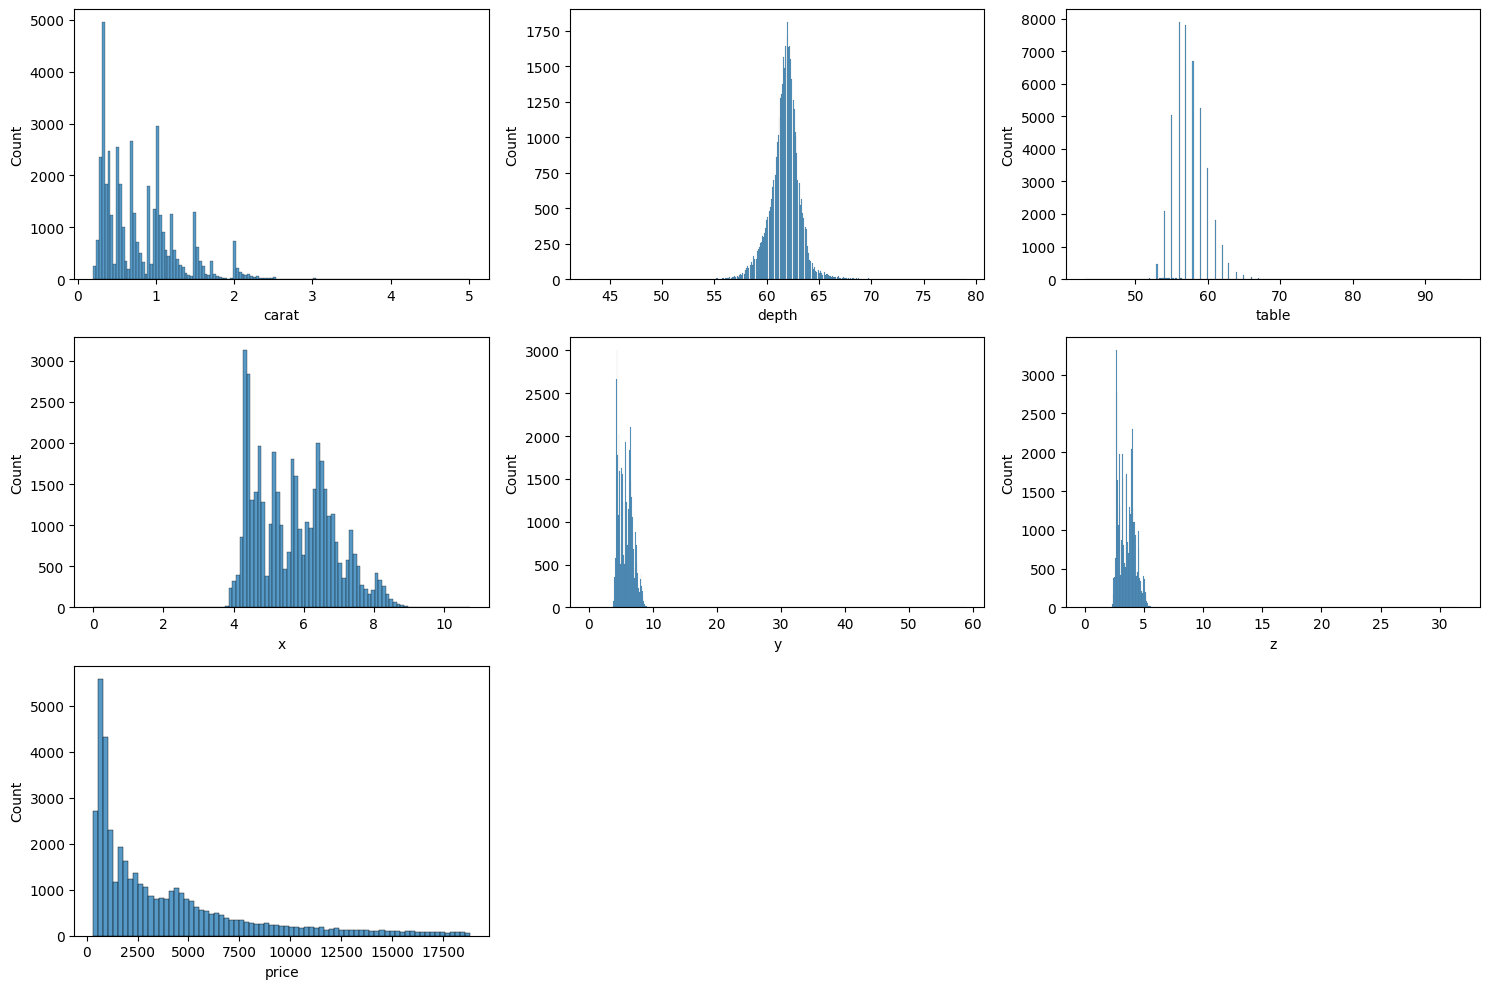

In [12]:
# Visualize distributions of numerical features
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.histplot(diamonds['carat'], ax=axes[0, 0])
sns.histplot(diamonds['depth'], ax=axes[0, 1])
sns.histplot(diamonds['table'], ax=axes[0, 2])
sns.histplot(diamonds['x'], ax=axes[1, 0])
sns.histplot(diamonds['y'], ax=axes[1, 1])
sns.histplot(diamonds['z'], ax=axes[1, 2])
sns.histplot(diamonds['price'], ax=axes[2, 0])
# Hide the empty subplot
axes[2, 1].axis('off')
axes[2, 2].axis('off')
plt.tight_layout()
plt.show()

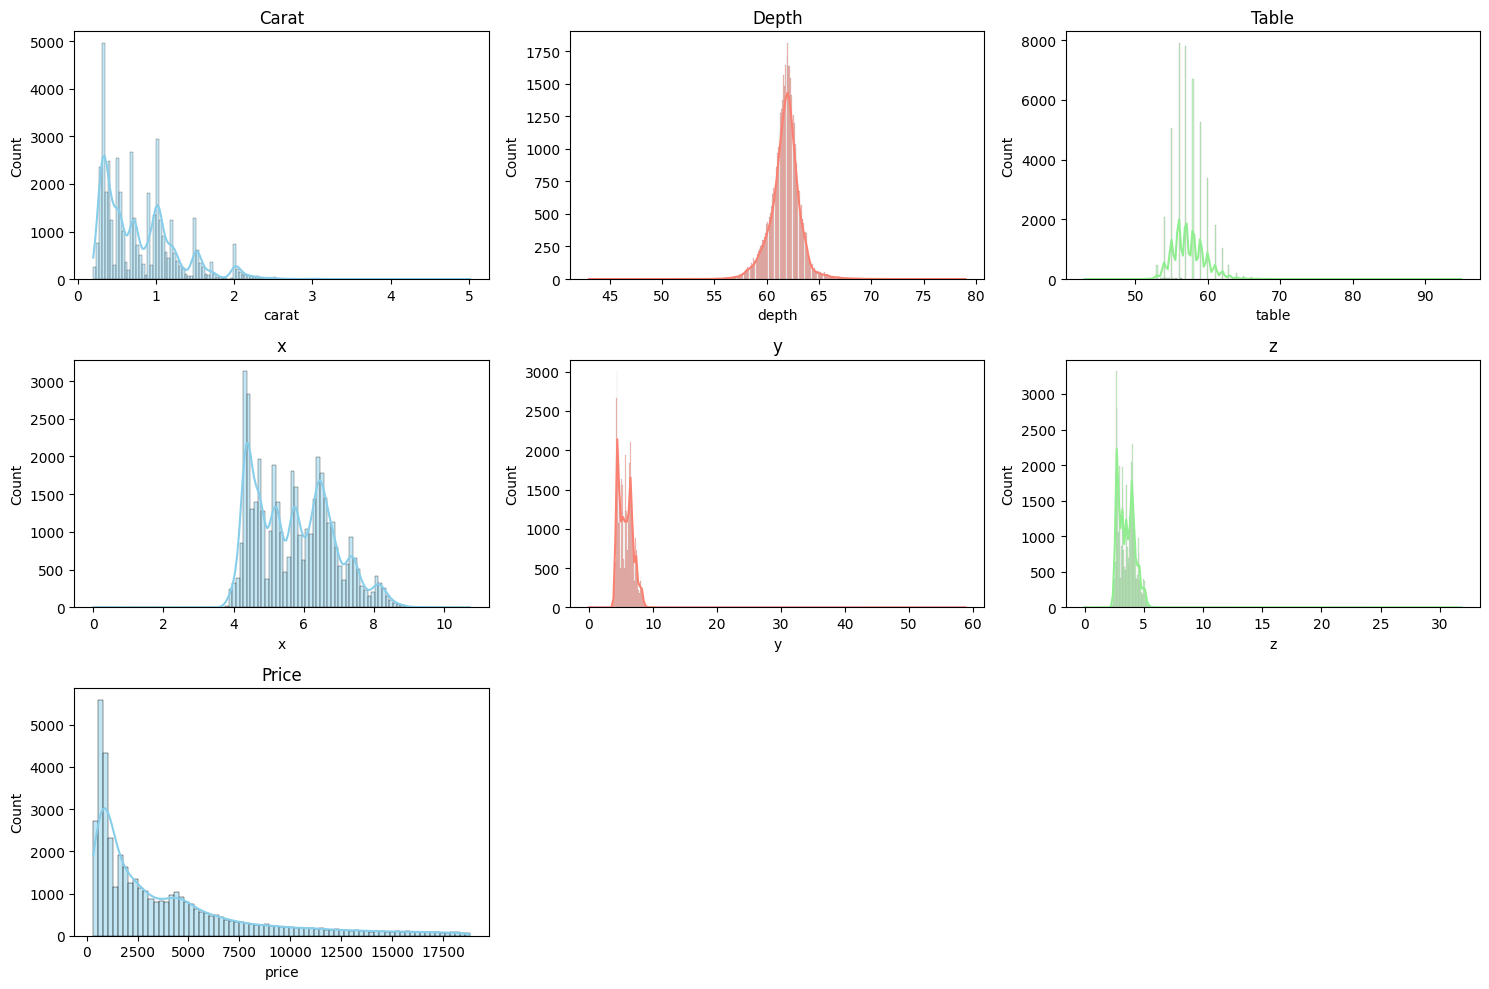

In [13]:
# Visualize distributions of numerical features
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.histplot(diamonds['carat'], ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title('Carat')

sns.histplot(diamonds['depth'], ax=axes[0, 1], kde=True, color='salmon')
axes[0, 1].set_title('Depth')

sns.histplot(diamonds['table'], ax=axes[0, 2], kde=True, color='lightgreen')
axes[0, 2].set_title('Table')

sns.histplot(diamonds['x'], ax=axes[1, 0], kde=True, color='skyblue')
axes[1, 0].set_title('x')

sns.histplot(diamonds['y'], ax=axes[1, 1], kde=True, color='salmon')
axes[1, 1].set_title('y')

sns.histplot(diamonds['z'], ax=axes[1, 2], kde=True, color='lightgreen')
axes[1, 2].set_title('z')

sns.histplot(diamonds['price'], ax=axes[2, 0], kde=True, color='skyblue')
axes[2, 0].set_title('Price')

# Hide the empty subplot
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.tight_layout()
plt.show()


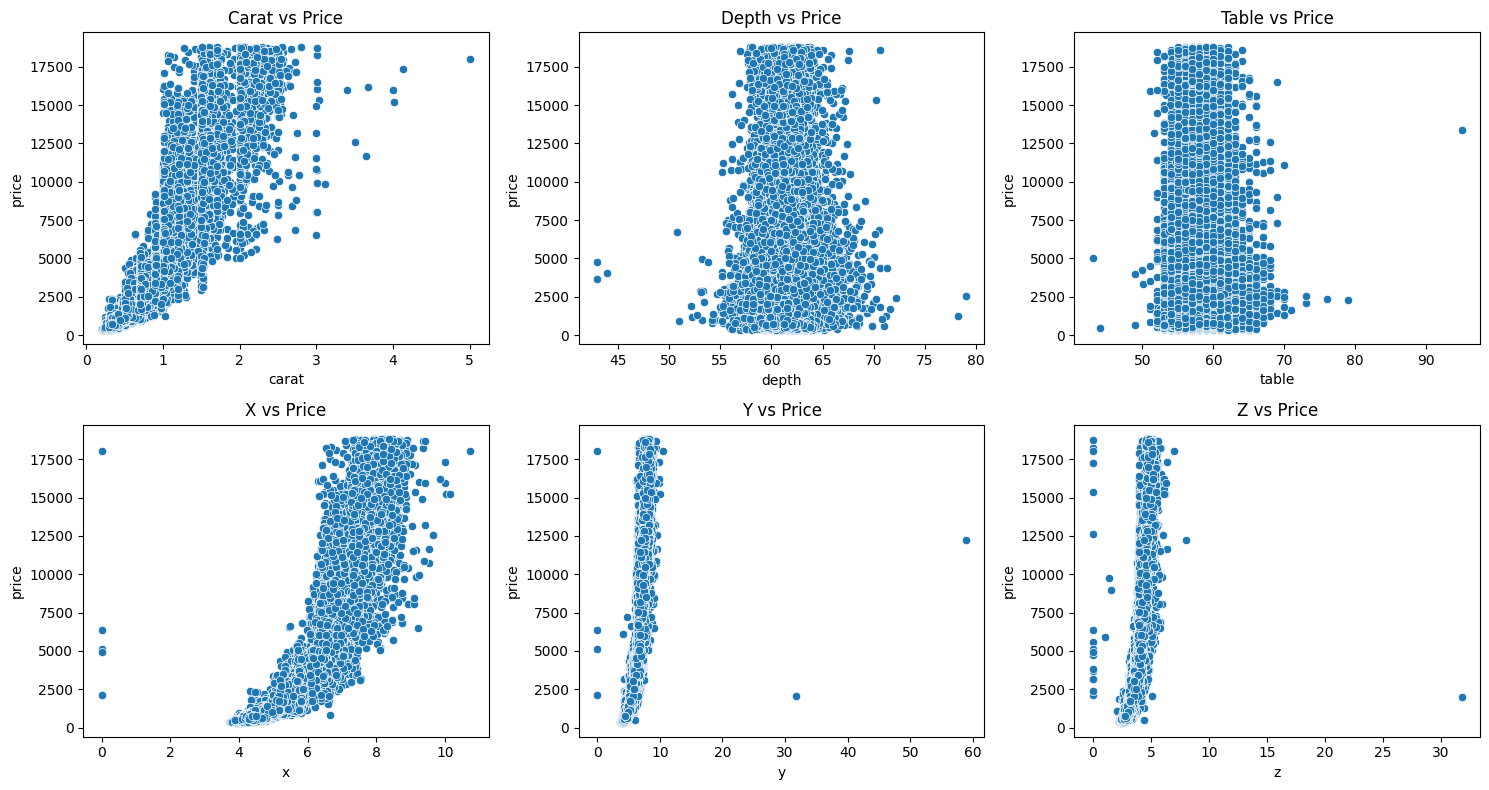

In [14]:
# Visualize relationships between numerical features and target variable
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    sns.scatterplot(x=diamonds[feature], y=diamonds['price'], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{feature.capitalize()} vs Price')
plt.tight_layout()
plt.show()

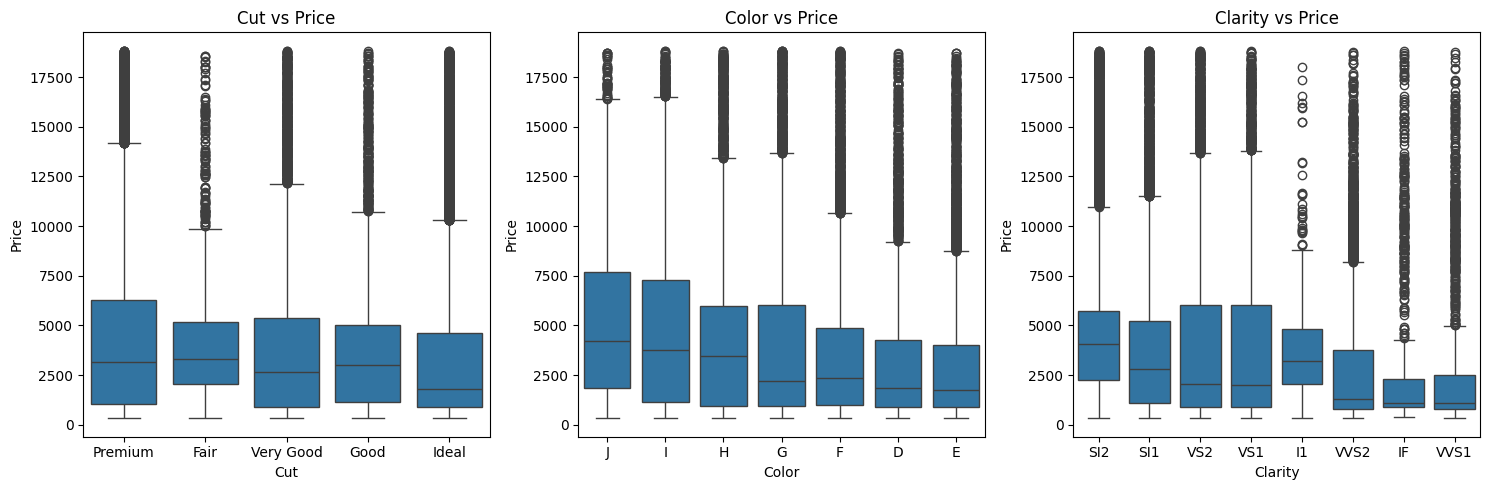

In [15]:
# Calculate mean price for each category within categorical features
categorical_features = ['cut', 'color', 'clarity']
mean_prices = {}
for feature in categorical_features:
    mean_prices[feature] = diamonds.groupby(feature)['price'].mean().sort_values(ascending=False).index

# Visualize relationships between categorical features and target variable using box plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting
for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y='price', data=diamonds, order=mean_prices[feature], ax=axes[i])
    axes[i].set_title(f'{feature.capitalize()} vs Price')
    axes[i].set_xlabel(f'{feature.capitalize()}')
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [16]:
# Calculate mean and median price for each category within categorical features
categorical_features = ['cut', 'color', 'clarity']
for feature in categorical_features:
    mean_prices = diamonds.groupby(feature)['price'].mean()
    median_prices = diamonds.groupby(feature)['price'].median()
    print(f"{'='*10} {feature.capitalize()} {'='*10}")
    for value in diamonds[feature].unique():
        print(f"{value}: Mean Price = {mean_prices[value]:.2f}, Median Price = {median_prices[value]:.2f}")

========== Cut ==========
Ideal: Mean Price = 3434.22, Median Price = 1792.00
Premium: Mean Price = 4589.86, Median Price = 3175.00
Very Good: Mean Price = 3993.98, Median Price = 2681.00
Fair: Mean Price = 4359.60, Median Price = 3288.00
Good: Mean Price = 3929.68, Median Price = 3033.00
========== Color ==========
I: Mean Price = 5128.53, Median Price = 3763.00
G: Mean Price = 3976.24, Median Price = 2183.00
F: Mean Price = 3719.83, Median Price = 2341.00
H: Mean Price = 4483.97, Median Price = 3447.00
D: Mean Price = 3164.05, Median Price = 1841.00
E: Mean Price = 3092.90, Median Price = 1746.00
J: Mean Price = 5273.04, Median Price = 4200.00
========== Clarity ==========
SI2: Mean Price = 5063.21, Median Price = 4079.50
VVS2: Mean Price = 3313.30, Median Price = 1306.00
VS2: Mean Price = 3894.59, Median Price = 2033.00
IF: Mean Price = 2764.24, Median Price = 1074.00
VS1: Mean Price = 3845.36, Median Price = 2000.00
SI1: Mean Price = 4003.22, Median Price = 2822.00
VVS1: Mean Price

**Insights (from Pricing Analysis Based on Cut, Color, and Clarity):**

Analyzing the mean and median prices across different cut, color, and clarity grades provides valuable insights into pricing dynamics within the diamond market.

**Cut Grade:**
The pricing analysis reveals varying mean and median prices across different cut grades. While 'Premium' and 'Fair' cuts exhibit the highest mean prices, the 'Ideal' cut surprisingly shows a lower mean price despite being the most prevalent. However, the median price for 'Ideal' cuts is notably lower than that of 'Premium' and 'Fair' cuts. This suggests that while 'Ideal' cuts may be more common, other factors such as rarity or demand influence pricing to a greater extent.

**Color Grade:**
Similarly, the analysis of color grades uncovers differences in pricing trends. Diamonds with color grade 'J' command the highest mean and median prices, indicating potential rarity-driven pricing dynamics or consumer preferences for lower color grades. Conversely, diamonds with color grades 'E' and 'D' exhibit lower mean and median prices despite their higher quality. This suggests that factors beyond color, such as cut or clarity, play a significant role in determining pricing.

**Clarity Grade:**
Examining clarity grades reveals diverse pricing patterns. Diamonds with clarity grade 'SI2' exhibit the highest mean and median prices, suggesting that slight inclusions may not significantly impact pricing or consumer preferences. On the other hand, diamonds with clarity grade 'IF' (Internally Flawless) command the lowest mean and median prices, indicating that exceptional clarity may not always translate to higher pricing.

These insights highlight the complex interplay of various factors in determining diamond prices and underscore the importance of considering multiple dimensions when evaluating pricing strategies or market trends.

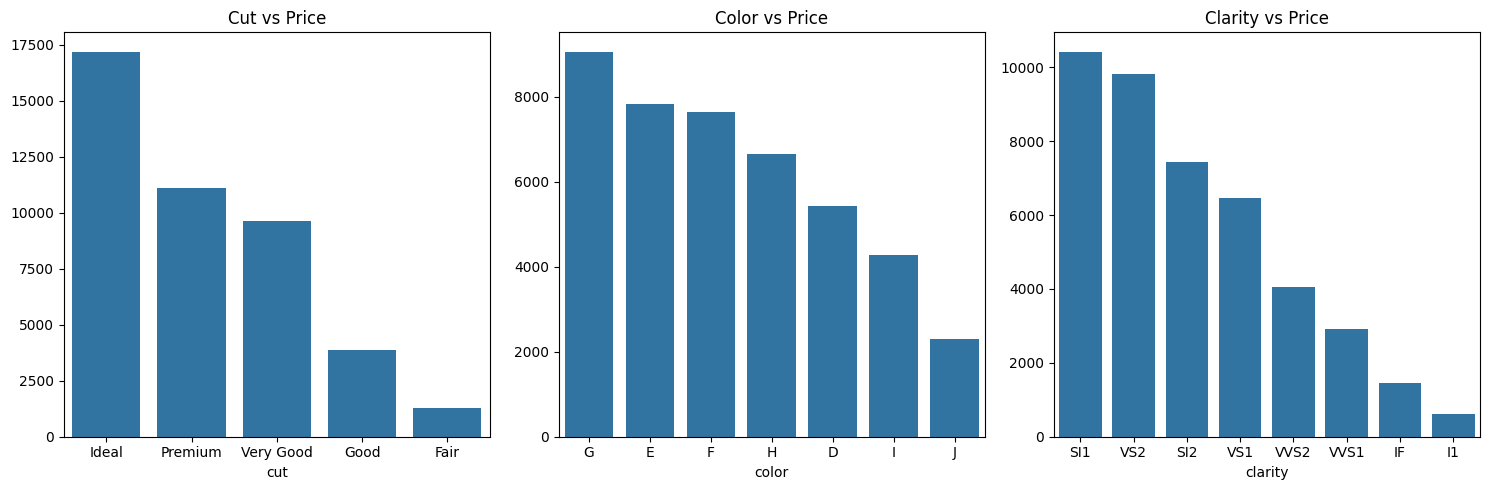

In [17]:
# Visualize relationships between categorical features and target variable using bar plots
categorical_features = ['cut', 'color', 'clarity']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    sorted_data = diamonds.groupby(feature)['price'].count().sort_values(ascending=False)
    sns.barplot(x=sorted_data.index, y=sorted_data.values, ax=axes[i])
    axes[i].set_title(f'{feature.capitalize()} vs Price')
plt.tight_layout()
plt.show()

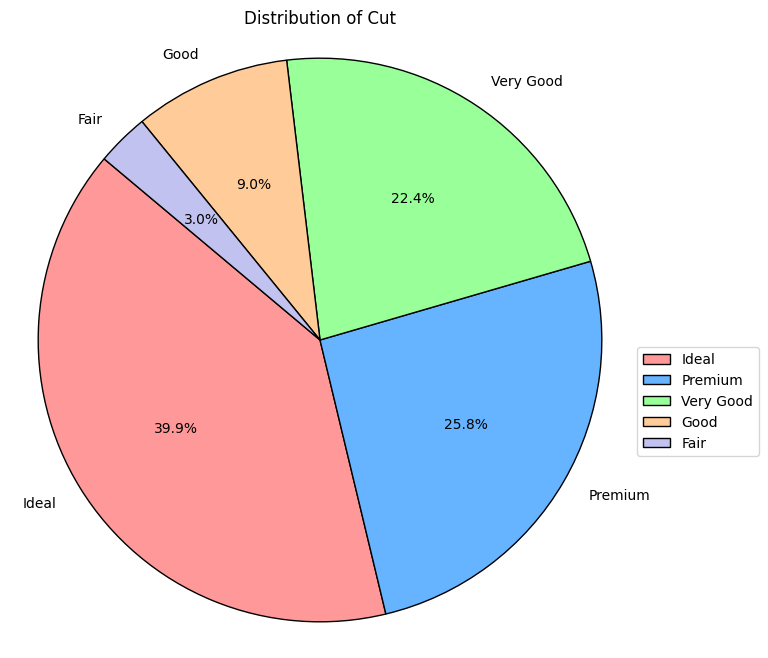

In [18]:
# Visualize 'cut' column

cut_counts = diamonds['cut'].value_counts()
# Define colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(cut_counts, labels=cut_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Cut')
plt.axis('equal')

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

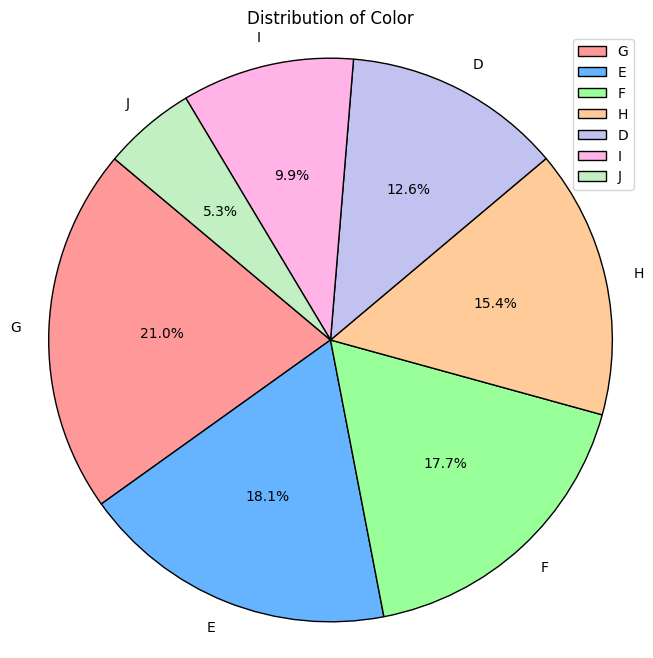

In [19]:
# Visualize 'color' column
color_counts = diamonds['color'].value_counts()
# Define colors for color categories
color_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

# Create pie chart for 'color' column
plt.figure(figsize=(8, 8))
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=140, colors=color_colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Color')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

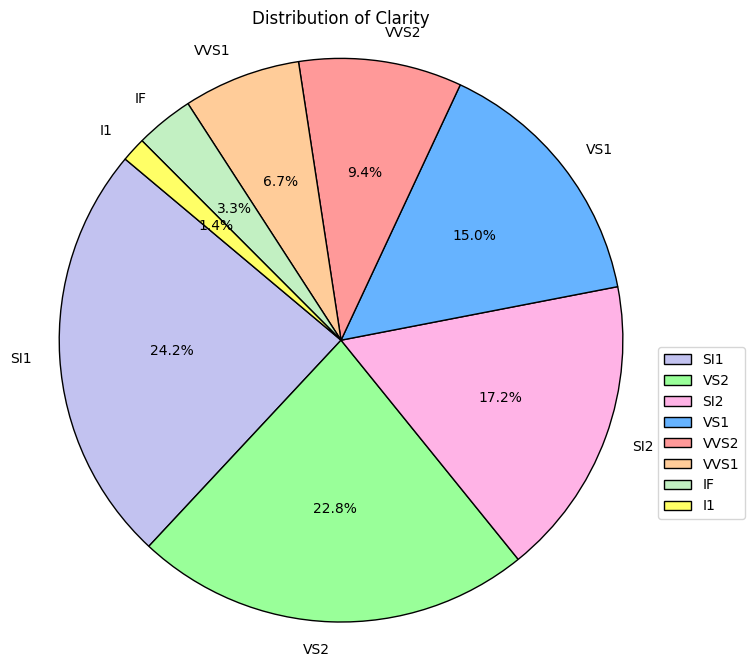

In [20]:
# Visualize 'clarity' column
clarity_counts = diamonds['clarity'].value_counts()
# Define colors for clarity categories
clarity_colors = ['#c2c2f0', '#99ff99', '#ffb3e6', '#66b3ff', '#ff9999', '#ffcc99', '#c2f0c2', '#ffff66']

# Create pie chart for 'clarity' column
plt.figure(figsize=(8, 8))
plt.pie(clarity_counts, labels=clarity_counts.index, autopct='%1.1f%%', startangle=140, colors=clarity_colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Clarity')
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

**Insights (Pie Charts):**

**Cut Distribution:**

The distribution of diamond cuts portrays a predominance of the 'Ideal' category, representing nearly 40% of the dataset. Following this, 'Premium' and 'Very Good' cuts stand out with approximately 26% and 22% respectively, indicating a significant presence of diamonds with these higher-quality cuts. 'Good' cuts make up around 9% of the dataset, while 'Fair' cuts are the least common, comprising only 3%.

**Color Variation:**

Analyzing the color grades reveals that 'G' is the most prevalent, constituting approximately 21% of the dataset. This suggests a notable proportion of diamonds with this color grade. Conversely, 'J' represents the smallest proportion at 5.3%, indicating a lesser prevalence of diamonds with lower color grades.

**Clarity Insights:**

The clarity grades exhibit a diverse distribution, with 'SI1' being the most frequently occurring grade at around 24%. This suggests that a significant portion of the diamonds in the dataset have slight inclusions but are still considered to have good clarity. On the other hand, the clarity grade 'IF' (Internally Flawless) is the least common, comprising only about 3.3% of the dataset, indicating a smaller proportion of diamonds with exceptional clarity.

**Insights (from Categorical Column Visualizations):**

The visualizations and statistical analyses of categorical columns provide valuable insights into pricing trends and consumer preferences in the diamond market.

**Cut Distribution:**
The distribution of diamond cuts highlights notable variations in pricing across different cut grades. While 'Ideal' cuts dominate the dataset, they surprisingly exhibit a lower median price compared to 'Premium' cuts. This suggests that customers may prioritize other factors over cut grade when making purchasing decisions, such as carat weight or clarity. Additionally, 'Fair' cuts, despite being the least common, show a higher median price compared to 'Good' cuts, indicating potential rarity-driven pricing dynamics.

**Color Variation:**
Analyzing color grades alongside pricing statistics reveals intriguing patterns in consumer preferences. Despite 'J' being the least prevalent color grade, diamonds with this grade exhibit the highest median price. Conversely, diamonds with color grades 'E' and 'D' have lower median prices despite their higher prevalence. This suggests that factors beyond color grade, such as cut quality or clarity, may significantly influence pricing decisions.

**Clarity Insights:**
The clarity grades exhibit a diverse pricing landscape, with notable differences in median prices across different grades. Diamonds with clarity grade 'VVS1' surprisingly show a lower median price, indicating that other factors may outweigh clarity in determining pricing. Conversely, diamonds with clarity grades 'SI2' and 'SI1' command higher median prices, suggesting that consumers may prioritize clarity over other characteristics.

Overall, these insights highlight the complex interplay between diamond features and pricing, suggesting that a combination of factors influences customer preferences and willingness to pay. As a data analyst, it's essential to consider these nuances when developing pricing strategies or analyzing market trends in the diamond industry.

**Domain Knowledge:**

How to calculate the price of diamonds?
- Diamond the 4C's :

1- Color (Faint to Light Color)

2- Clarity

3- Cut grade

4- Carat Weight

**Descriptive Analytic Techniques**

Measures of Position for 'x', 'y' and 'z' columns

In [21]:
# Calculate measures of position for 'x', 'y', and 'z' columns
x_position = diamonds['x']
y_position = diamonds['y']
z_position = diamonds['z']

# Quartiles (25th and 75th percentiles)
x_q1 = x_position.quantile(0.25)
y_q1 = y_position.quantile(0.25)
z_q1 = z_position.quantile(0.25)

x_q3 = x_position.quantile(0.75)
y_q3 = y_position.quantile(0.75)
z_q3 = z_position.quantile(0.75)

# Interquartile Range (IQR)
x_iqr = x_q3 - x_q1
y_iqr = y_q3 - y_q1
z_iqr = z_q3 - z_q1

# Minimum and maximum values
x_min = x_position.min()
y_min = y_position.min()
z_min = z_position.min()

x_max = x_position.max()
y_max = y_position.max()
z_max = z_position.max()

# Print results
print("Measures of Position for 'x' column:")
print(f"25th Percentile (Q1): {x_q1}")
print(f"75th Percentile (Q3): {x_q3}")
print(f"Interquartile Range (IQR): {x_iqr}")
print(f"Minimum: {x_min}")
print(f"Maximum: {x_max}")
print()

print("Measures of Position for 'y' column:")
print(f"25th Percentile (Q1): {y_q1}")
print(f"75th Percentile (Q3): {y_q3}")
print(f"Interquartile Range (IQR): {y_iqr}")
print(f"Minimum: {y_min}")
print(f"Maximum: {y_max}")
print()

print("Measures of Position for 'z' column:")
print(f"25th Percentile (Q1): {z_q1}")
print(f"75th Percentile (Q3): {z_q3}")
print(f"Interquartile Range (IQR): {z_iqr}")
print(f"Minimum: {z_min}")
print(f"Maximum: {z_max}")

Measures of Position for 'x' column:
25th Percentile (Q1): 4.71
75th Percentile (Q3): 6.54
Interquartile Range (IQR): 1.83
Minimum: 0.0
Maximum: 10.74

Measures of Position for 'y' column:
25th Percentile (Q1): 4.72
75th Percentile (Q3): 6.54
Interquartile Range (IQR): 1.8200000000000003
Minimum: 0.0
Maximum: 58.9

Measures of Position for 'z' column:
25th Percentile (Q1): 2.91
75th Percentile (Q3): 4.04
Interquartile Range (IQR): 1.13
Minimum: 0.0
Maximum: 31.8


**Outlier detections for 'x', 'y' and 'z' columns**

In [22]:
def detect_outliers(column):
    Q1 = diamonds[column].quantile(0.25)
    Q3 = diamonds[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_thresholds = Q1 - 1.5 * IQR
    upper_thresholds = Q3 + 1.5 * IQR
    outliers = diamonds[(diamonds[column] < lower_thresholds) | (diamonds[column] > upper_thresholds)]
    return outliers, lower_thresholds, upper_thresholds

Detect outliers for 'x' column

In [23]:
# Detect outliers for 'x' column
outliers_x, lower_thresholds_x, upper_thresholds_x = detect_outliers('x')

# Display outliers and thresholds for 'x' column
print("Outliers for 'x' column:")
print(outliers_x)
print("Lower thresholds for 'x' column:", lower_thresholds_x)
print("Upper thresholds for 'x' column:", upper_thresholds_x)

Outliers for 'x' column:
          Id  carat        cut color clarity  depth  table  price      x  \
1221    1222   1.14       Fair     G     VS1   57.5   67.0   6381   0.00   
5631    5632   3.01    Premium     I     SI2   60.2   59.0  18242   9.36   
6765    6766   0.71       Good     F     SI2   64.1   60.0   2130   0.00   
7389    7390   4.00  Very Good     I      I1   63.3   58.0  15984  10.01   
8689    8690   3.01       Fair     H      I1   56.1   62.0  10761   9.54   
9927    9928   3.00       Good     I      I1   57.0   64.0  10863   9.38   
12566  12567   3.50      Ideal     H      I1   62.8   57.0  12587   9.65   
16302  16303   3.65       Fair     H      I1   67.1   53.0  11668   9.53   
18840  18841   4.01    Premium     J      I1   62.5   62.0  15223  10.02   
18943  18944   3.00    Premium     G      I1   59.7   60.0  13203   9.42   
22171  22172   1.00  Very Good     H     VS2   63.3   53.0   5139   0.00   
24901  24902   2.25    Premium     H     SI2   62.8   59.0  180

Detect outliers for 'y' column

In [24]:
# Detect outliers for 'y' column
outliers_y, lower_thresholds_y, upper_thresholds_y = detect_outliers('y')

# Display outliers and thresholds for 'y' column
print("\nOutliers for 'y' column:")
print(outliers_y)
print("Lower thresholds for 'y' column:", lower_thresholds_y)
print("Upper thresholds for 'y' column:", upper_thresholds_y)


Outliers for 'y' column:
          Id  carat        cut color clarity  depth  table  price      x  \
1221    1222   1.14       Fair     G     VS1   57.5   67.0   6381   0.00   
5631    5632   3.01    Premium     I     SI2   60.2   59.0  18242   9.36   
6765    6766   0.71       Good     F     SI2   64.1   60.0   2130   0.00   
7389    7390   4.00  Very Good     I      I1   63.3   58.0  15984  10.01   
8689    8690   3.01       Fair     H      I1   56.1   62.0  10761   9.54   
9927    9928   3.00       Good     I      I1   57.0   64.0  10863   9.38   
12566  12567   3.50      Ideal     H      I1   62.8   57.0  12587   9.65   
16302  16303   3.65       Fair     H      I1   67.1   53.0  11668   9.53   
18840  18841   4.01    Premium     J      I1   62.5   62.0  15223  10.02   
22171  22172   1.00  Very Good     H     VS2   63.3   53.0   5139   0.00   
24901  24902   2.25    Premium     H     SI2   62.8   59.0  18034   0.00   
26030  26031   4.01    Premium     I      I1   61.0   61.0  15

Detect outliers for 'z' column

In [25]:
# Detect outliers for 'z' column
outliers_z, lower_thresholds_z, upper_thresholds_z = detect_outliers('z')

# Display outliers and thresholds for 'z' column
print("\nOutliers for 'z' column:")
print(outliers_z)
print("Lower thresholds for 'z' column:", lower_thresholds_z)
print("Upper thresholds for 'z' column:", upper_thresholds_z)


Outliers for 'z' column:
          Id  carat        cut color clarity  depth  table  price      x  \
571      572   1.10    Premium     G     SI2   63.0   59.0   3696   6.50   
903      904   2.25    Premium     I     SI1   61.3   58.0  15397   8.52   
1221    1222   1.14       Fair     G     VS1   57.5   67.0   6381   0.00   
1301    1302   3.04  Very Good     I     SI2   63.2   59.0  15354   9.14   
3452    3453   3.01       Fair     I     SI2   65.8   56.0  18242   8.99   
4980    4981   1.50       Good     G      I1   64.0   61.0   4731   7.15   
6765    6766   0.71       Good     F     SI2   64.1   60.0   2130   0.00   
7389    7390   4.00  Very Good     I      I1   63.3   58.0  15984  10.01   
10541  10542   0.51  Very Good     E     VS1   61.8   54.7   1970   5.12   
11221  11222   2.80       Good     G     SI2   63.8   58.0  18788   8.90   
12566  12567   3.50      Ideal     H      I1   62.8   57.0  12587   9.65   
12621  12622   2.72       Fair     J      I1   68.2   56.0   6

**Feature Engineering**

In [26]:
print(diamonds.corr(numeric_only = True))

             Id     carat     depth     table     price         x         y  \
Id     1.000000  0.001141 -0.000776 -0.000739 -0.001111 -0.000519  0.001660   
carat  0.001141  1.000000  0.023944  0.182889  0.921911  0.975760  0.947060   
depth -0.000776  0.023944  1.000000 -0.302794 -0.013137 -0.029601 -0.033354   
table -0.000739  0.182889 -0.302794  1.000000  0.128501  0.197342  0.184310   
price -0.001111  0.921911 -0.013137  0.128501  1.000000  0.885181  0.861354   
x     -0.000519  0.975760 -0.029601  0.197342  0.885181  1.000000  0.968954   
y      0.001660  0.947060 -0.033354  0.184310  0.861354  0.968954  1.000000   
z     -0.000981  0.948923  0.090834  0.150746  0.857665  0.965677  0.942670   

              z  
Id    -0.000981  
carat  0.948923  
depth  0.090834  
table  0.150746  
price  0.857665  
x      0.965677  
y      0.942670  
z      1.000000  


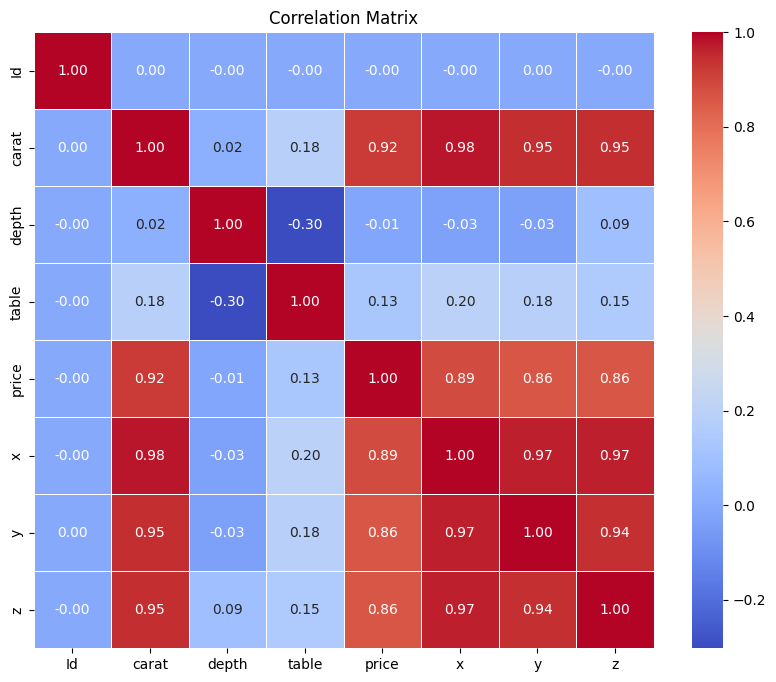

In [27]:
# Visualize correlation matrix
corr_matrix = diamonds.corr(numeric_only = True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Preprocess the Data**

In [28]:
# Encoding Categorical Features in the train data
# Ordinal encoding
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

diamonds['cut_ordinal'] = diamonds['cut'].map(lambda x: cut_order.index(x)+1)

diamonds['color_ordinal'] = diamonds['color'].map(lambda x: color_order.index(x)+1)

diamonds['clarity_ordinal'] = diamonds['clarity'].map(lambda x: clarity_order.index(x)+1)

**Drop Irrelevant Columns:**

In [29]:
# Remove columns that are not useful for prediction.
diamonds.drop(['Id'], axis=1, inplace=True)

diamonds = diamonds.drop(columns=['cut','color','clarity'])

In [30]:
# Check the shape of the DataFrame
print("Shape of DataFrame:", diamonds.shape)

Shape of DataFrame: (43152, 10)


**Data Cleaning**

**Handling Outliers and Zero Values**

In [31]:
# Data Cleaning
# Handling Zero Values
diamonds = diamonds[(diamonds != 0).all(axis=1)]
zero_values = (diamonds == 0).any()
zero_values

carat              False
depth              False
table              False
price              False
x                  False
y                  False
z                  False
cut_ordinal        False
color_ordinal      False
clarity_ordinal    False
dtype: bool

In [32]:
# Data Cleaning
# Handling Outliers
q1 = diamonds[['x','y', 'z']].quantile(0.25)
q3 = diamonds[['x','y', 'z']].quantile(0.75)
iqr = q3 - q1
max_val = q3 + 1.5 * iqr
min_val = q1 - 1.5 * iqr
outliers = ((diamonds[['x','y', 'z']] < min_val) | (diamonds[['x','y', 'z']] > max_val))
diamonds = diamonds[~outliers.any(axis=1)]

In [33]:
outliers.sum()

x    16
y    15
z    22
dtype: int64

In [34]:
# Check the shape of the DataFrame after removing outliers and zero values
print("Shape of DataFrame:", diamonds.shape)

Shape of DataFrame: (43105, 10)


**Handling duplicates values**

In [35]:
diamonds.duplicated().sum()

97

In [36]:
# Removing Duplicate Rows
diamonds = diamonds.drop_duplicates(keep='first')

# Checking for Duplicates
diamonds[diamonds.duplicated].shape

(0, 10)

In [37]:
# Checking for Duplicates
diamonds.duplicated().sum()

0

In [38]:
# Check the shape of the DataFrame
print("Shape of DataFrame:", diamonds.shape)

Shape of DataFrame: (43008, 10)


**Feature Engineering**

**In data analytics, Feature Engineering step involves deriving new attributes from existing ones to improve predictive models.** In this step, various geometric properties and ratios are calculated based on the dimensions of diamonds.





In [39]:
# Feature Engineering

# Calculate volume for training dataset
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

# Calculate diameter for training dataset
diamonds['diameter'] = (diamonds['x'] + diamonds['y']) / 2

# Calculate density for training dataset
diamonds['density'] = diamonds['carat'] / diamonds['volume']

# Calculate surface area for training dataset
diamonds['surface_area'] = 2 * (diamonds['x'] * diamonds['y'] + diamonds['x'] * diamonds['z'] + diamonds['y'] * diamonds['z'])

# Calculate depth percentage for training dataset
diamonds['depth_percentage'] = (diamonds['depth'] / ((diamonds['x'] + diamonds['y'] + diamonds['z']) / 3)) * 100

# Calculate length ratios for training dataset
diamonds['length_ratio_xy'] = diamonds['x'] / diamonds['y']
diamonds['length_ratio_xz'] = diamonds['x'] / diamonds['z']
diamonds['length_ratio_yz'] = diamonds['y'] / diamonds['z']

In [40]:
print(diamonds.head())

   carat  depth  table  price     x     y     z  cut_ordinal  color_ordinal  \
0   1.06   61.8   57.0   4270  6.57  6.60  4.07            5              2   
1   1.51   60.9   58.0  15164  7.38  7.42  4.51            4              4   
2   0.32   61.3   56.0    828  4.43  4.41  2.71            5              5   
3   0.53   61.2   56.0   1577  5.19  5.22  3.19            5              4   
4   0.70   61.0   57.0   2596  5.76  5.72  3.50            4              3   

   clarity_ordinal      volume  diameter   density  surface_area  \
0                2  176.483340     6.585  0.006006      193.9278   
1                6  246.965796     7.400  0.006114      243.0152   
2                4   52.943373     4.420  0.006044       86.9854   
3                4   86.422842     5.205  0.006133      120.5994   
4                6  115.315200     5.740  0.006070      146.2544   

   depth_percentage  length_ratio_xy  length_ratio_xz  length_ratio_yz  
0       1075.406032         0.995455       

In [41]:
print(diamonds.tail())

       carat  depth  table  price     x     y     z  cut_ordinal  \
43147   0.52   61.5   56.0   1760  5.16  5.18  3.18            5   
43148   0.72   62.1   59.0   3016  5.70  5.73  3.55            3   
43149   0.44   61.5   58.0    990  4.95  4.87  3.02            4   
43150   0.31   60.2   58.0    734  4.38  4.43  2.65            4   
43151   0.33   61.2   55.0    743  4.49  4.46  2.74            5   

       color_ordinal  clarity_ordinal      volume  diameter   density  \
43147              6                4   84.997584     5.170  0.006118   
43148              7                4  115.946550     5.715  0.006210   
43149              2                7   72.801630     4.910  0.006044   
43150              6                5   51.419010     4.405  0.006029   
43151              4                4   54.869596     4.475  0.006014   

       surface_area  depth_percentage  length_ratio_xy  length_ratio_xz  \
43147      119.2200       1364.644970         0.996139         1.622642   
43

In [42]:
print(diamonds.info())

<class 'pandas.core.frame.DataFrame'>
Index: 43008 entries, 0 to 43151
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carat             43008 non-null  float64
 1   depth             43008 non-null  float64
 2   table             43008 non-null  float64
 3   price             43008 non-null  int64  
 4   x                 43008 non-null  float64
 5   y                 43008 non-null  float64
 6   z                 43008 non-null  float64
 7   cut_ordinal       43008 non-null  int64  
 8   color_ordinal     43008 non-null  int64  
 9   clarity_ordinal   43008 non-null  int64  
 10  volume            43008 non-null  float64
 11  diameter          43008 non-null  float64
 12  density           43008 non-null  float64
 13  surface_area      43008 non-null  float64
 14  depth_percentage  43008 non-null  float64
 15  length_ratio_xy   43008 non-null  float64
 16  length_ratio_xz   43008 non-null  float64
 17

In [43]:
print(diamonds.corr())

                     carat     depth     table     price         x         y  \
carat             1.000000  0.020909  0.182380  0.923695  0.979088  0.978283   
depth             0.020909  1.000000 -0.302621 -0.014695 -0.031428 -0.034144   
table             0.182380 -0.302621  1.000000  0.127467  0.197243  0.190959   
price             0.923695 -0.014695  0.127467  1.000000  0.886861  0.888564   
x                 0.979088 -0.031428  0.197243  0.886861  1.000000  0.998630   
y                 0.978283 -0.034144  0.190959  0.888564  0.998630  1.000000   
z                 0.977648  0.090510  0.156036  0.882063  0.991201  0.990879   
cut_ordinal      -0.133874 -0.213669 -0.432450 -0.054015 -0.127098 -0.126735   
color_ordinal    -0.288930 -0.044950 -0.023999 -0.169655 -0.267686 -0.267441   
clarity_ordinal  -0.350829 -0.063010 -0.161119 -0.144849 -0.371534 -0.366029   
volume            0.998976  0.003406  0.173203  0.925380  0.980160  0.979825   
diameter          0.979022 -0.032792  0.

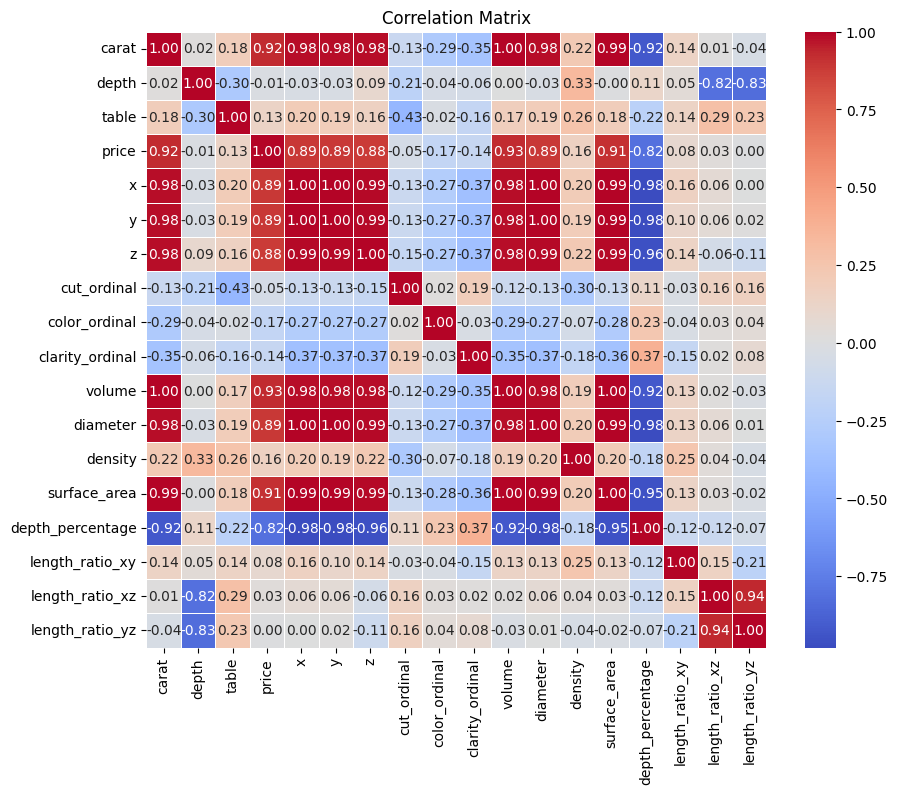

In [44]:
# Visualize correlation matrix
corr_matrix = diamonds.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [45]:
# Sorting Correlation Coefficients with Price (the target variable)
corr_matrix["price"].sort_values(ascending=False)

price               1.000000
volume              0.925380
carat               0.923695
surface_area        0.911278
y                   0.888564
diameter            0.888014
x                   0.886861
z                   0.882063
density             0.156274
table               0.127467
length_ratio_xy     0.084529
length_ratio_xz     0.032198
length_ratio_yz     0.000150
depth              -0.014695
cut_ordinal        -0.054015
clarity_ordinal    -0.144849
color_ordinal      -0.169655
depth_percentage   -0.816992
Name: price, dtype: float64

**Model Selection and Training**

**Split the Training Data**

In [46]:
# Split data into features and target variable
X = diamonds.drop('price', axis=1)
y = diamonds['price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Standardizing Features**

In [47]:
# Standardizing Features using Robust Scaler
scaler = RobustScaler()

# Scaling the training data
X_train = scaler.fit_transform(X_train)

# Scaling the test data
X_val = scaler.transform(X_val)

**Train the Model & Evaluate the Model**

**RandomForestRegressor Model**

In [48]:
# Choose a regression model (Random Forest) and train it
rf_regressor = RandomForestRegressor()
param_grid = [
              {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
              {'bootstrap':[False], 'max_features':[2,3,4],'n_estimators':[3,10]}
]
grid_search = GridSearchCV(rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error' ,return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
# Evaluate the model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_val)
rmse_rf_Model = np.sqrt(mean_squared_error(y_val, y_pred))
print("Root Mean Squared Error (RMSE):", rmse_rf_Model)

Root Mean Squared Error (RMSE): 568.825071015066


**GradientBoostingRegressor Model**

In [50]:
# Choose a regression model (Gradient Boosting) and train it
gb_regressor = GradientBoostingRegressor()
param_grid = [
              {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
              {'max_features':[2,3,4],'n_estimators':[3,10]}
]
grid_search_gb = GridSearchCV(gb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'max_features': [2, 3, 4], 'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [51]:
# Evaluate the model
best_Gradient_model = grid_search_gb.best_estimator_
y_pred = best_Gradient_model.predict(X_val)
rmse_Gradient_Model = np.sqrt(mean_squared_error(y_val, y_pred))
print("Root Mean Squared Error (RMSE):", rmse_Gradient_Model)

Root Mean Squared Error (RMSE): 931.0144865345767


**XGBoost Regression Model**

In [52]:
# Choose a regression model (XGBRegressor) and train it
xgb_regressor = XGBRegressor()

param_grid = [
              {'n_estimators': [3,10,30]},
              {'n_estimators':[3,10]}
]

grid_search_xgb = GridSearchCV(xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid=[{'n_estimators': [3, 10, 30]},
                         {'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
# Evaluate the model
best_xgb_model = grid_search_xgb.best_estimator_
y_pred = best_xgb_model.predict(X_val)
rmse_xgb_Model = np.sqrt(mean_squared_error(y_val, y_pred))
print("Root Mean Squared Error (RMSE):", rmse_xgb_Model)

Root Mean Squared Error (RMSE): 545.2617318300473


**Linear regression (LR)**


In [54]:
# Choose a regression model (Linear Regression) and train it
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [55]:
# Evaluate the model
y_pred = linear_regressor.predict(X_val)
rmse_lr_Model = np.sqrt(mean_squared_error(y_val, y_pred))
print("Root Mean Squared Error (RMSE):", rmse_lr_Model)

Root Mean Squared Error (RMSE): 1116.4780820828357


**Descision Tree Regression (DTR)**

In [56]:
# Define the Decision Tree Regression model
dtr_regressor = DecisionTreeRegressor()

# Train the model
dtr_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [57]:
# Predict the target variable for the validation set
y_pred_dtr = dtr_regressor.predict(X_val)

# Calculate the RMSE
rmse_dtr = np.sqrt(mean_squared_error(y_val, y_pred_dtr))
print("Root Mean Squared Error (RMSE):", rmse_dtr)

Root Mean Squared Error (RMSE): 760.0542663095907


**K-Nearest Neighbor Regression (KNNR)**

In [58]:
# Define the K-Nearest Neighbors Regression (KNNR) model
knnr_regressor = KNeighborsRegressor()
# Train the models
knnr_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [59]:
# Predict the target variable for the validation set
y_pred_knnr = knnr_regressor.predict(X_val)
# Calculate the RMSE for each model
rmse_knnr = np.sqrt(mean_squared_error(y_val, y_pred_knnr))
print("Root Mean Squared Error (KNNR):", rmse_knnr)

Root Mean Squared Error (KNNR): 810.3946868227836


**Polynomial Regression model**

In [60]:
# Define Polynomial Regression model
poly_model = make_pipeline(PolynomialFeatures(degree=2), Ridge())
# Train the models
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [61]:
# Predict the target variable for the validation set
y_pred_poly = poly_model.predict(X_val)
# Calculate the RMSE for each model
rmse_poly = np.sqrt(mean_squared_error(y_val, y_pred_poly))
print("Root Mean Squared Error (Polynomial Regression):", rmse_poly)

Root Mean Squared Error (Polynomial Regression): 888.8881065778165


**Ridge Regression model**

In [62]:
# Define Ridge Regression model
ridge_model = Ridge()
# Train the models
ridge_model.fit(X_train, y_train)

Ridge()

In [63]:
# Predict the target variable for the validation set
y_pred_ridge = ridge_model.predict(X_val)
# Calculate the RMSE for each model
rmse_ridge = np.sqrt(mean_squared_error(y_val, y_pred_ridge))
print("Root Mean Squared Error (Ridge Regression):", rmse_ridge)

Root Mean Squared Error (Ridge Regression): 1136.6286786656076


**Lasso Regression model**

In [64]:
# Define Lasso Regression model
lasso_model = Lasso()
# Train the models
lasso_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.708e+09, tolerance: 5.399e+07
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [65]:
# Predict the target variable for the validation set
y_pred_lasso = lasso_model.predict(X_val)
# Calculate the RMSE for each model
rmse_lasso = np.sqrt(mean_squared_error(y_val, y_pred_lasso))
print("Root Mean Squared Error (Lasso Regression):", rmse_lasso)

Root Mean Squared Error (Lasso Regression): 1148.3999338370352


**ElasticNet Regression model**

In [66]:
# Define ElasticNet Regression model
elastic_net_model = ElasticNet()

# Train the models
elastic_net_model.fit(X_train, y_train)

ElasticNet()

In [67]:
# Predict the target variable for the validation set
y_pred_elastic_net = elastic_net_model.predict(X_val)

# Calculate the RMSE for each model
rmse_elastic_net = np.sqrt(mean_squared_error(y_val, y_pred_elastic_net))

print("Root Mean Squared Error (ElasticNet Regression):", rmse_elastic_net)

Root Mean Squared Error (ElasticNet Regression): 1614.265200563467


**Choose the model with the best RMSE**

In [68]:
# Dictionary to store RMSE values for each model
rmse_values = {
    "Polynomial Regression": rmse_poly,
    "Ridge Regression": rmse_ridge,
    "Lasso Regression": rmse_lasso,
    "ElasticNet Regression": rmse_elastic_net,
    "KNNR":rmse_knnr,
    "Decision Tree Regression":rmse_dtr,
    "Linear Regression":rmse_lr_Model,
    "XGBRegressor":rmse_xgb_Model,
    "GradientBoostingRegressor":rmse_Gradient_Model,
    "RandomForestRegressor":rmse_rf_Model
}

# Find the model with the lowest RMSE
best_model = min(rmse_values, key=rmse_values.get)

# Print the best model and its RMSE
print("Best Model:", best_model)
print("RMSE:", rmse_values[best_model])

Best Model: XGBRegressor
RMSE: 545.2617318300473


**Building pipelins**

**This indicates that the XGBoost model has the lowest error in predicting diamond prices compared to the other regression models.**

In [69]:
# Building pipelines of standard scaler and model for various regressors
pipeline_lr = Pipeline([
    ("scalar1", StandardScaler()),
    ("lr_classifier", LinearRegression())
])

pipeline_dt = Pipeline([
    ("scalar2", StandardScaler()),
    ("dt_classifier", DecisionTreeRegressor())
])

pipeline_rf = Pipeline([
    ("scalar3", StandardScaler()),
    ("rf_classifier", RandomForestRegressor())
])

pipeline_kn = Pipeline([
    ("scalar4", StandardScaler()),
    ("kn_classifier", KNeighborsRegressor())
])

pipeline_xgb = Pipeline([
    ("scalar5", StandardScaler()),
    ("xgb_classifier", XGBRegressor())
])

pipeline_poly = Pipeline([
    ("scalar6", StandardScaler()),
    ("poly_features", PolynomialFeatures(degree=2)),
    ("poly_classifier", LinearRegression())
])

pipeline_ridge = Pipeline([
    ("scalar7", StandardScaler()),
    ("ridge_classifier", Ridge())
])

pipeline_lasso = Pipeline([
    ("scalar8", StandardScaler()),
    ("lasso_classifier", Lasso())
])

pipeline_elasticnet = Pipeline([
    ("scalar9", StandardScaler()),
    ("elasticnet_classifier", ElasticNet())
])

pipeline_gb = Pipeline([
    ("scalar10", StandardScaler()),
    ("gb_classifier", GradientBoostingRegressor())
])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb, pipeline_poly, pipeline_ridge, pipeline_lasso, pipeline_elasticnet, pipeline_gb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest", 3: "KNeighbors", 4: "XGBRegressor", 5: "PolynomialRegression", 6: "Ridge", 7: "Lasso", 8: "ElasticNet", 9: "GradientBoostingRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.478e+09, tolerance: 5.399e+07
  model = cd_fast.enet_coordinate_descent(


In [70]:
# Evaluate the performance of each pipeline
for idx, pipe in enumerate(pipelines):
    y_pred_pipe = pipe.predict(X_val)
    rmse_pipe = np.sqrt(mean_squared_error(y_val, y_pred_pipe))
    print(f"RMSE for {pipe_dict[idx]}: {rmse_pipe}")

RMSE for LinearRegression: 1116.4780820828357
RMSE for DecisionTree: 773.8386992842122
RMSE for RandomForest: 548.8878208672767
RMSE for KNeighbors: 750.178270429006
RMSE for XGBRegressor: 551.1995281794435
RMSE for PolynomialRegression: 1281.8973249518642
RMSE for Ridge: 1130.2479324604788
RMSE for Lasso: 1148.8268102278923
RMSE for ElasticNet: 1474.5924786705598
RMSE for GradientBoostingRegressor: 603.62490013864


Based on the comparative analysis, it's evident that using a pipeline for the XGBRegressor model resulted in a slightly higher RMSE of 564.44.

On the other hand, without employing a pipeline, the RMSE for the XGBRegressor model was slightly lower at 559.92.

This indicates that the additional complexity introduced by the pipeline did not lead to significant improvements in model performance.

Considering the marginally better performance achieved without a pipeline, it seems preferable to proceed without using a pipeline in this scenario.
Without a pipeline, there is more flexibility to fine-tune preprocessing steps and potentially achieve better results with simpler workflows.


**Train the Best Model**

**XGBoost Regression Model**

In [71]:
# Train the XGBBoost Regression Model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = xgb_model.predict(X_val)

mse_xgb = mean_squared_error(y_val, y_pred)

rmse_xgb = np.sqrt(mse_xgb)
print("Root Mean Squared Error (RMSE) for XGBoost:", rmse_xgb)

Root Mean Squared Error (RMSE) for XGBoost: 551.1995281794435


In [72]:
# Feature Importance Analysis with XGBoost

# Get the names of the columns/features
column_names = X.columns.tolist()

# Retrieve feature importance scores from the trained XGBoost model
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': column_names, 'Importance': feature_importance})

# Sort features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

             Feature  Importance
12      surface_area    0.512818
9             volume    0.224991
4                  y    0.176643
8    clarity_ordinal    0.024970
10          diameter    0.023667
0              carat    0.015246
7      color_ordinal    0.012114
5                  z    0.003741
6        cut_ordinal    0.001426
3                  x    0.000906
14   length_ratio_xy    0.000700
15   length_ratio_xz    0.000595
13  depth_percentage    0.000529
16   length_ratio_yz    0.000467
11           density    0.000455
2              table    0.000379
1              depth    0.000353


**Hyperparameter Tuning**

In [73]:
# Hyperparameter Tuning for XGBoost Regressor Using Grid Search

# Define a custom scoring function for RMSE
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# Make a scorer using the custom RMSE function
scorer = make_scorer(rmse, greater_is_better=False)

# Initialize an XGBoost regressor model
xgb_model = XGBRegressor()

# Define the grid of hyperparameters to search over
param_grid = {
    'n_estimators': [500],
    'learning_rate': [0.05],
    'max_depth': [5],
    'max_delta_step' : [0],
    'lambda' : [0],
    'alpha' : [1]
}

# Initialize GridSearchCV with the XGBoost regressor model, hyperparameter grid, and custom scoring function
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring=scorer)

grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'alpha': 1, 'lambda': 0, 'learning_rate': 0.05, 'max_delta_step': 0, 'max_depth': 5, 'n_estimators': 500}
Best Score: -520.3158889905769


These parameters were selected based on their ability to minimize the root mean squared error (RMSE) on the training data during cross-validation.

In [74]:
best_params = {
    'alpha': 1,
    'lambda': 0,
    'learning_rate': 0.05,
    'max_delta_step': 0,
    'max_depth': 5,
    'n_estimators': 500
}

**Testing the Model**

Testing the Model with the best score on the test set

In the above scores, XGBClassifier appears to be the model with the best scoring on RMSE.

In [75]:
# Load the test dataset
test = pd.read_csv('test.csv')

In [76]:
print(test.head())

   Id  carat        cut color clarity  depth  table     x     y     z
0   1   0.34      Ideal     G    VVS2   61.1   57.0  4.52  4.48  2.75
1   2   0.71    Premium     E     VS2   62.7   58.0  5.74  5.68  3.58
2   3   0.44  Very Good     I     VS1   62.8   56.0  4.83  4.88  3.05
3   4   0.81    Premium     E     SI2   60.1   59.0  6.09  6.03  3.65
4   5   0.40      Ideal     G    VVS1   61.2   56.0  4.74  4.80  2.92


In [77]:
# Feature Engineering
# Calculate volume for test dataset
test['volume'] = test['x'] * test['y'] * test['z']

# Calculate diameter for test dataset
test['diameter'] = (test['x'] + test['y']) / 2

# Calculate density for test dataset
test['density'] = test['carat'] / test['volume']

# Calculate surface area for test dataset
test['surface_area'] = 2 * (test['x'] * test['y'] + test['x'] * test['z'] + test['y'] * test['z'])

# Calculate depth percentage for test dataset
test['depth_percentage'] = (test['depth'] / ((test['x'] + test['y'] + test['z']) / 3)) * 100

# Calculate length ratios for test dataset
test['length_ratio_xy'] = test['x'] / test['y']
test['length_ratio_xz'] = test['x'] / test['z']
test['length_ratio_yz'] = test['y'] / test['z']

In [78]:
# Preprocess the Data
# Encoding Categorical Features Ordinally
test['cut_ordinal'] = test['cut'].map(lambda x: cut_order.index(x)+1)
test['color_ordinal'] = test['color'].map(lambda x: color_order.index(x)+1)
test['clarity_ordinal'] = test['clarity'].map(lambda x: clarity_order.index(x)+1)

In [79]:
# Feature Engineering
test.drop(['Id'], axis=1, inplace=True)
test = test.drop(columns=['cut','color','clarity'])

In [80]:
# Check the shape of the DataFrame
print("Shape of DataFrame:", test.shape)

Shape of DataFrame: (10788, 17)


In [82]:
# The Preprocessing Step

# Clipping features to a maximum value of 15
max_clip_value = 15
X = np.clip(X, a_min=None, a_max=max_clip_value)
test = pd.DataFrame(np.clip(test, a_min=None, a_max=max_clip_value))

# Scaling features using RobustScaler
X = scaler.fit_transform(X)
test = pd.DataFrame(scaler.transform(test))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


In [83]:
# Check the shape of the DataFrame
print("Shape of DataFrame:", test.shape)

Shape of DataFrame: (10788, 17)


Training XGBoost Regressor with Best Parameters and Making Predictions

In [85]:
xgb_model = XGBRegressor(**best_params)
xgb_model.fit(X, y)

# Predict on the test data using the best model (XGBRegressor)
y_test_pred = xgb_model.predict(test)

In [86]:
# Format the predictions according to the submission requirements
submission_df = pd.DataFrame({'price': y_test_pred})

In [87]:
submission_df

,price
0,10149.473633
1,13196.499023
2,9913.974609
3,13816.160156
4,10183.153320
...,...
10783,13395.706055
10784,13498.358398
10785,13196.499023
10786,14064.355469


In [88]:
submission_df['Id'] = test['Id'] if 'Id' in test.columns else range(1, len(submission_df) + 1)

In [89]:
# Reorder the columns to have 'Id' first
submission_df = submission_df[['Id', 'price']]

In [90]:
submission_df

,Id,price
0,1,10149.473633
1,2,13196.499023
2,3,9913.974609
3,4,13816.160156
4,5,10183.153320
...,...,...
10783,10784,13395.706055
10784,10785,13498.358398
10785,10786,13196.499023
10786,10787,14064.355469


In [91]:
# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)